# 538.把二叉搜索树转换为累加树
输入：二叉搜索树的根节点  
输出：转换后的累加树，每个节点的新值等于原树中大于等于原值的值之和

累加树（Greater Sum Tree）：  
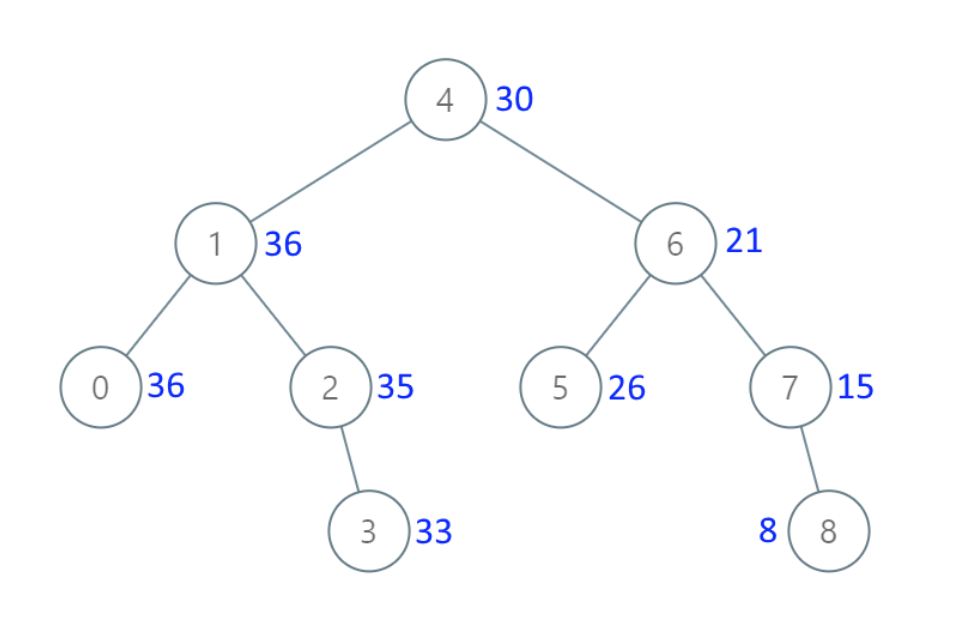

## 思路
一定要利用好二叉搜索树有序的特性  

二叉搜索树的节点的值都大于其左孩子，小于其右孩子  

对于原来的每个节点，把右子树的所有节点依次累加就行  

也就是说累加的顺序是 右中左  ，反中序遍历   
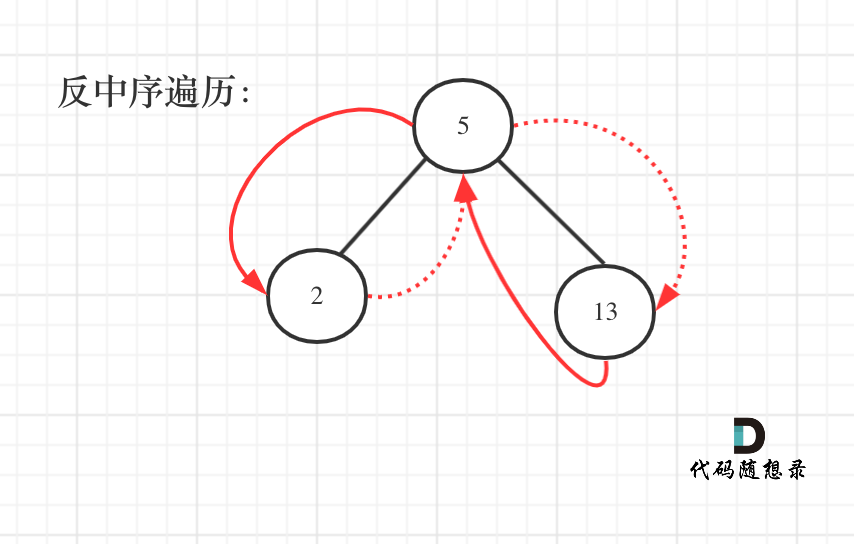  

累加的过程需要两个指针，一个记录当前节点，一个记录上一个节点  

## 递归
1. 参数及返回值  
   - 参数：当前节点的值  
   - 返回值：这里需要递归整个树，所以不需要接住返回值进行操作  

2. 终止条件：  
   - 遇到空节点终止  

3. 单层递归逻辑  
   - 右中左的遍历顺序  
   - 先递归右子树  
   - 再处理中节点：当前节点值加上右子树累加的值  
   - 更新pre指针的累加值
   - 递归左子树

## 迭代法
中序遍历模板题，右中左的遍历顺序  

In [ ]:
# 递归法

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def convertBST(self, root:TreeNode) -> TreeNode:
        self.pre = 0
        self.traversal(root)
        return root

    def traversal(self, cur):
        if cur is None:
            return
        self.traversal(cur.right)
        cur.val += self.pre
        self.pre = cur.val
        self.traversal(cur.left)

In [ ]:
# 迭代法
class Solution:
    def convertBST(self, root):
        if not root: return root
        stack = []

        cur = root
        pre = 0
        while cur or stack:
            if cur:
                stack.append(cur)
                cur = cur.right   # 右
            else:
                cur = stack.pop() # 中
                cur.val += pre
                pre = cur.val
                cur = cur.left    # 左
        return root